In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d_fn = "./../drawing/simulated/canvasses.npy"

def sigmoid(x):
    return 1/(1 +np.exp(-x))

drawings = np.load(d_fn)
#drawings[-1, :, :] = sigmoid(drawings[-1, :, :])
drawings = sigmoid(drawings)

In [3]:
drawings.shape

(15, 50, 16384)

In [4]:
drawings[-1, :, :].max()

0.5396578

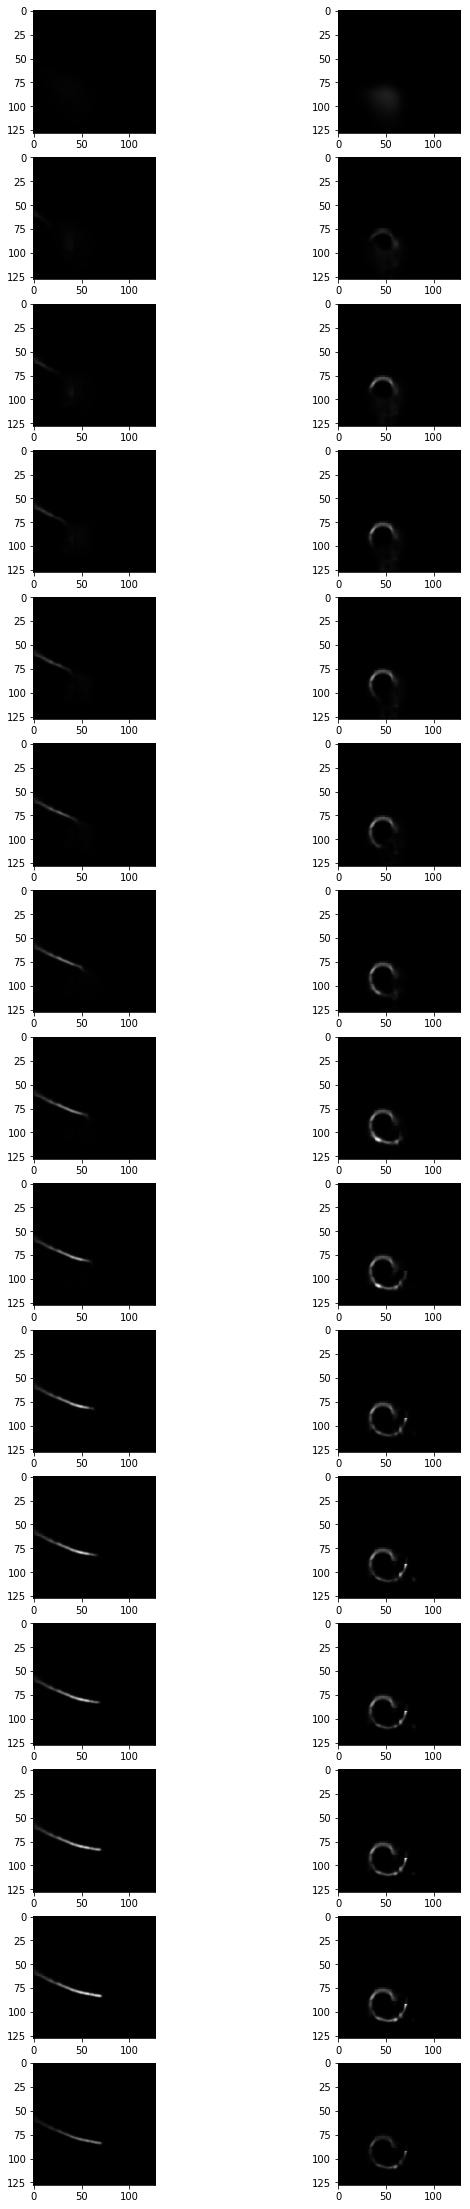

In [5]:
T = drawings.shape[0]
n_plots = 2
which = 0
ref = 3

vmax = 0.5 #np.max(drawings[T-1][which])
vmin = 0 #np.min(drawings[T-1][which])

fig, ax = plt.subplots(nrows=T, ncols=n_plots, figsize=(10, 40) )

for t in range(T):
    ao = ax[t]
    w = which
    normal = drawings[t][w].reshape((128, 128)) #- drawings[0][w].reshape((128, 128))
    reference = drawings[t][ref].reshape((128, 128))

    if not t==(T-1):
        img_1 = ao[1].imshow(reference, vmin=vmin, vmax=vmax, cmap="Greys_r")
        img_0 = ao[0].imshow(normal, vmin=vmin, vmax=vmax, cmap="Greys_r")
        
    else:
        img_1 = ao[1].imshow(reference, vmin=0, vmax=1, cmap="Greys_r")
        img_0 = ao[0].imshow(normal, vmin=0, vmax=1, cmap="Greys_r")
        
    
    #print(t, np.max(normal), np.min(normal), np.average(normal), np.std(normal))


In [6]:
batch_size = drawings.shape[1]

finished = drawings[-1:,:,].reshape((batch_size, 128, 128))
reference = np.load("../drawing/simulated/references.npy").reshape((batch_size, 128, 128))

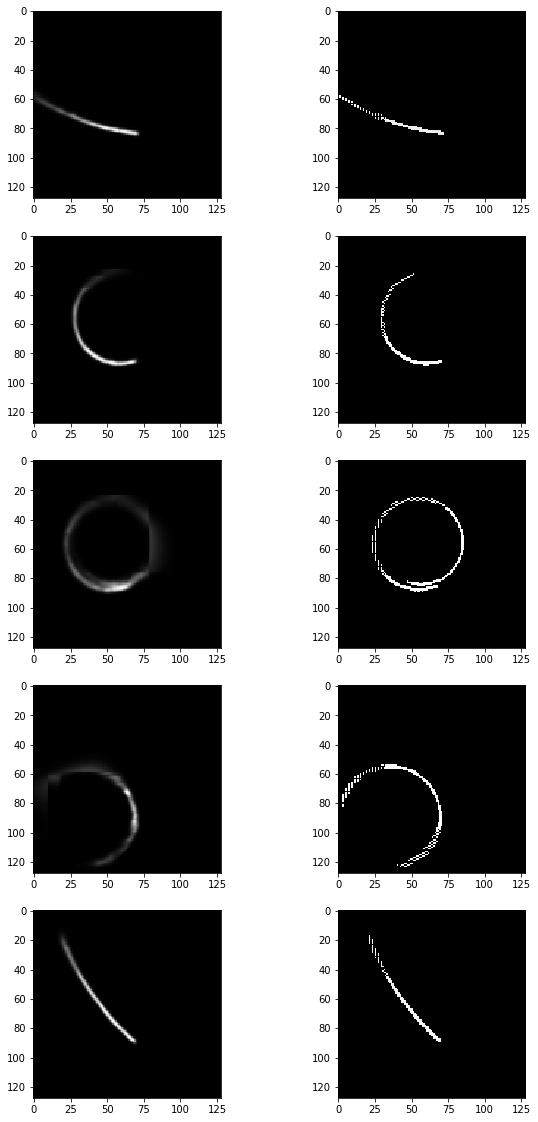

In [7]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
which_to_show = [0, 5, 10, 4, 6]

for w, ax in zip(which_to_show, axs):
    ax[0].imshow(finished[w], cmap="Greys_r")
    ax[1].imshow(reference[w], cmap="Greys_r")